In [459]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

# Part 1: The Data

In [460]:
data = pd.read_csv('wdbc.csv')
data = data.drop(columns = ['id'])
def diagnosis_numeric(x):
    if x=='B':
        return 0
    if x=='M':
        return 1
data['diagnosis'] = data['diagnosis'].apply(diagnosis_numeric)
data

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [461]:
table = {"Missing Values": data.isnull().sum(), "Mean": data.mean(), 
         "Minimum" : data.min(), "Maximum": data.max()}

table = pd.DataFrame(table)
table['Range'] = table['Maximum'] - table['Minimum']
table['Correlation'] = data.corrwith(data['diagnosis'])
table


,Missing Values,Mean,Minimum,Maximum,Range,Correlation
diagnosis,0,0.372583,0.000000,1.00000,1.000000,1.000000
radius.mean,0,14.127292,6.981000,28.11000,21.129000,0.730029
texture.mean,0,19.289649,9.710000,39.28000,29.570000,0.415185
perimeter.mean,0,91.969033,43.790000,188.50000,144.710000,0.742636
area.mean,0,654.889104,143.500000,2501.00000,2357.500000,0.708984
smoothness.mean,0,0.096360,0.052630,0.16340,0.110770,0.358560
compactness.mean,0,0.104341,0.019380,0.34540,0.326020,0.596534
concavity.mean,0,0.088799,0.000000,0.42680,0.426800,0.696360
concpoints.mean,0,0.048919,0.000000,0.20120,0.201200,0.776614
symmetry.mean,0,0.181162,0.106000,0.30400,0.198000,0.330499


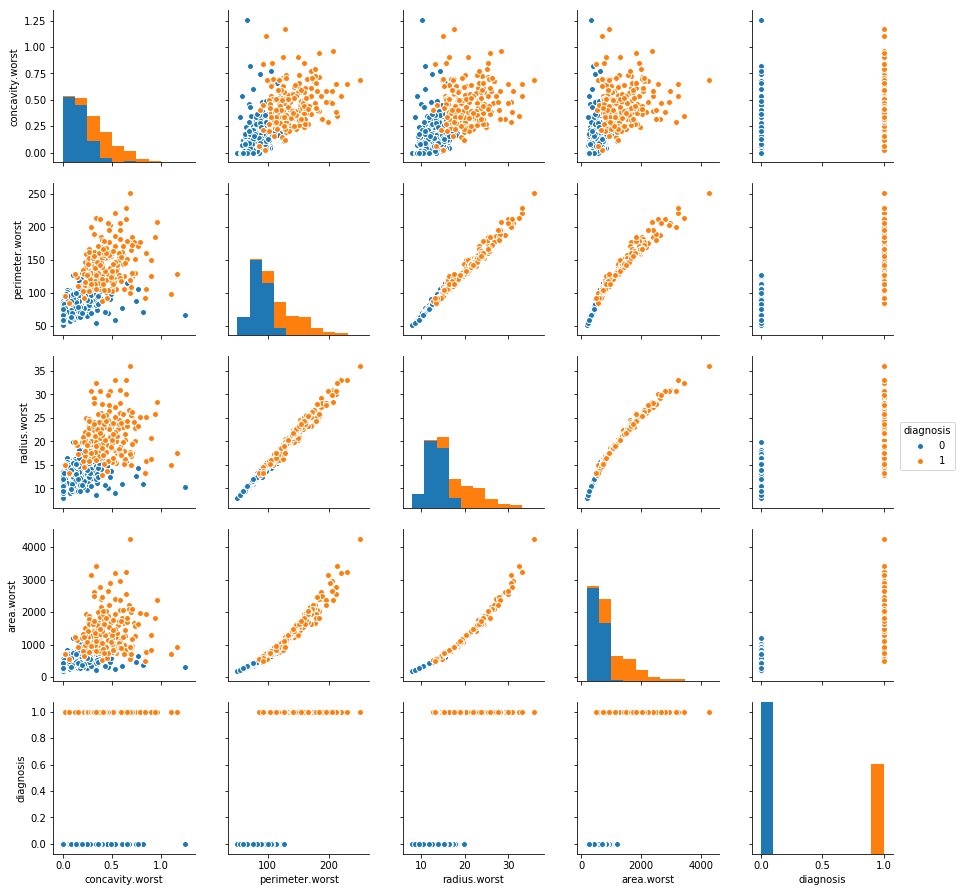

In [463]:
features = ['concavity.worst', 
        'perimeter.worst', 'radius.worst', 
        'area.worst', 'diagnosis']

sns.pairplot(data,
             x_vars = features,
             y_vars = features,
             hue = 'diagnosis')

# Part 2: Decision Boundary

## 2.1 kNN Case

In [464]:
from sklearn.model_selection import train_test_split
features = data[['concavity.mean', 'compactness.mean']]
outcome = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(features, outcome, train_size=0.75, 
                                                    test_size = 0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

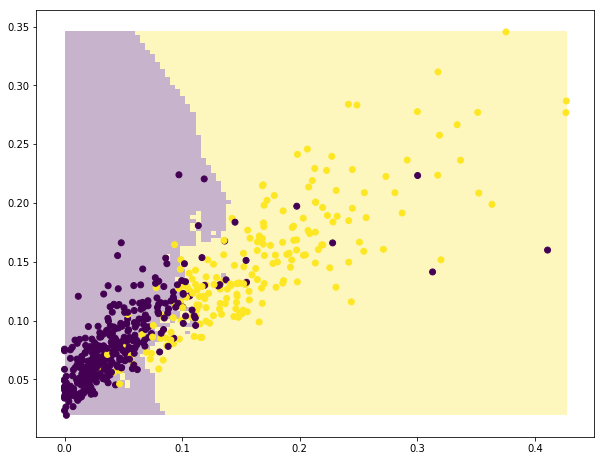

In [465]:
# KNN Decision Boundary 
X1 = data['concavity.mean']
X2 = data['compactness.mean']
Y = data['diagnosis']
X = np.stack((X1, X2), axis=1)
m = knn.fit(X,Y)
ex1 = np.linspace(X1.min(), X1.max(), 100)
ex2 = np.linspace(X2.min(), X2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
g = np.stack((xx1.ravel(), xx2.ravel()), axis=1)
hatY = m.predict(g).reshape(100,100)
plt.figure(figsize=(10,10))
plt.imshow(hatY, extent=(X1.min(), X1.max(), X2.min(), X2.max()), 
                       interpolation='none', origin='lower', alpha = 0.3)
plt.scatter(X1, X2, c=Y)
plt.show()


> The kNN algorithm is fairly accurate with picking up the shape of predictions since the two regions are mapped appropriately. It is also good at picking up noise since we see several points adjacent to the decision boundary line. There are many points that are confident in the predictions which are on the outer edges of the decision boundary graph. Overall, this model is pretty accurate in predicting the diagnosis based on the means of perimeter and radius.

## 2.2 Logistic Regression

In [466]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
pred_lr= logisticRegr.predict(x_test)

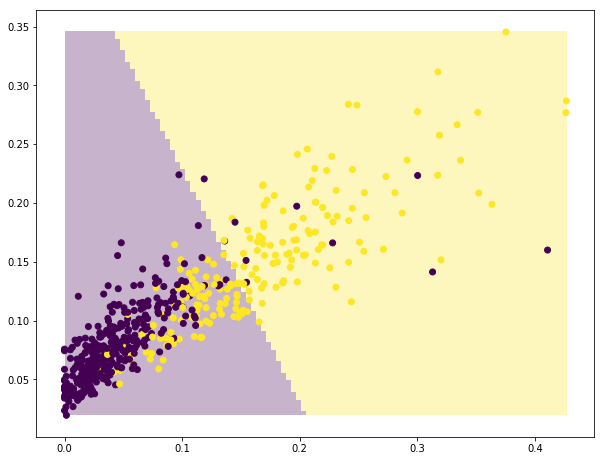

In [467]:
# Logistic Regression Decision Boundary 
X1 = data['concavity.mean']
X2 = data['compactness.mean']
Y = data['diagnosis']
X = np.stack((X1, X2), axis=1)
m = LogisticRegression().fit(X,Y)
ex1 = np.linspace(X1.min(), X1.max(), 100)
ex2 = np.linspace(X2.min(), X2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
g = np.stack((xx1.ravel(), xx2.ravel()), axis=1)
hatY = m.predict(g).reshape(100,100)
plt.figure(figsize=(10,10))
plt.imshow(hatY, extent=(X1.min(), X1.max(), X2.min(), X2.max()), 
                       interpolation='none', origin='lower', alpha = 0.3)
plt.scatter(X1, X2, c=Y)
plt.show()

> The Logistic Algorithm does a slightly better job than the kNN decision boundary since there are more point predictions in the correct classes. There is also more spread with the points with Logistic Regression which shows that there are more confident predictions, as in that there is more distance between the points from the boundary line. kNN had more points clustered around the boundary line. The shape of the boundary is also more linear whereas the kNN plot had a boundary line that was more concaved.

## 2.3 Feature Engineering

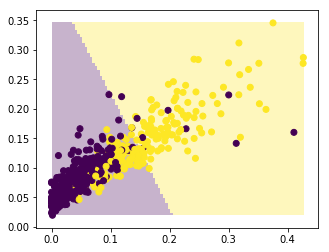

In [468]:
# Original features
X1 = data['concavity.mean']
X2 = data['compactness.mean']

# Engineered features
X1_X2 = X1 * X2
X1_power = np.power(X1, 2)
X2_power = np.power(X2, 2)
X1_cube = np.power(X1, 3)
X2_cube = np.power(X2, 3)

# Engineered Features Decision Boundary
X = np.stack((X1, X2, X1_X2, X1_power, X2_power, X1_cube, X2_cube), axis=1)
m = LogisticRegression().fit(X,Y)
ex1 = np.linspace(X1.min(), X1.max(), 100)
ex2 = np.linspace(X2.min(), X2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
xx3 = xx1*xx2
xx4 = xx1**2
xx5 = xx2**2
xx6 = xx1**3
xx7 = xx2**3
g = np.stack((xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel(), xx5.ravel(), xx6.ravel(), xx7.ravel()), axis=1)
hatY = m.predict(g).reshape(100,100)
plt.imshow(hatY, extent=(X1.min(), X1.max(), X2.min(), X2.max()), 
                       interpolation='none', origin='lower', alpha = 0.3)
plt.scatter(X1, X2, c=Y)
plt.show()


In [469]:
featured = data
featured['X1'] = X1
featured['X2'] = X2
featured['X1_X2'] = X1_X2
featured['X1_power'] = X1_power
featured['X2_power'] = X2_power
featured['X1_cube'] = X1_cube
featured['X2_cube'] = X2_cube
featured

values = featured[['concavity.mean', 'compactness.mean']]
target = featured['diagnosis']
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(values, target, train_size=0.75, 
                                                    test_size = 0.25, random_state=42)


## 2.4 Support Vector Machines

In [470]:
svclassifier = SVC(kernel='poly', degree=1)  
svclassifier = SVC(kernel='linear', degree=1)  
svclassifier = SVC(kernel='rbf', degree=7)
svclassifier = SVC(probability = True)  
svclassifier.fit(x_train, y_train) 
pred_svc = svclassifier.predict(x_test)

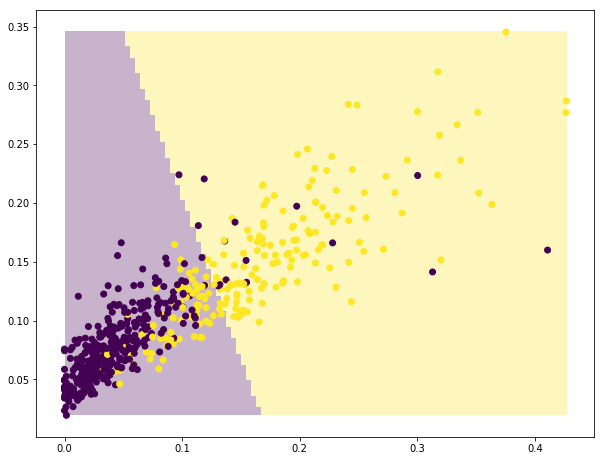

In [471]:
X1 = data['concavity.mean']
X2 = data['compactness.mean']
Y = data['diagnosis']
X = np.stack((X1, X2), axis=1)
m = svclassifier.fit(X,Y)
ex1 = np.linspace(X1.min(), X1.max(), 100)
ex2 = np.linspace(X2.min(), X2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
g = np.stack((xx1.ravel(), xx2.ravel()), axis=1)
hatY = m.predict(g).reshape(100,100)
plt.figure(figsize=(10,10))
plt.imshow(hatY, extent=(X1.min(), X1.max(), X2.min(), X2.max()), 
                       interpolation='none', origin='lower', alpha = 0.3)
plt.scatter(X1, X2, c=Y)
plt.show()


> Using the SVM model, I compared the linear and poly (with degree 1) kernels. I noticed that the decision boundary graph looked more reasonable with the poly kernel because there were more prediction points in the correct class versus the linear decision boundary graph. Based on my observations between Logistic Regression and the SVM model, I conclude that these two models have the same amount of reason in their predictions and the classes. Both models have equal amount of spread away from the decision boundary line, however there are still prediction points that are not classified in their respective region correctly.

# Part 3: ROC Curve

In [472]:
# Confusion Matrices
from sklearn.metrics import confusion_matrix
knn_matrix = confusion_matrix(y_test, pred)
log_matrix = confusion_matrix(y_test, pred_lr)
svc_matrix = confusion_matrix(y_test, pred_svc)

print(knn_matrix)
print(log_matrix)
print(svc_matrix)


[[83  6]
 [10 44]]
[[88  1]
 [26 28]]
[[87  2]
 [19 35]]


In [473]:
# Accuracy: percentage of correct answers
def accuracy(preds, y_test):
    tp = 0
    tn = 0
    for i in range(len(y_test)):
        if y_test[i] == 1:
            if preds[i] == 1:
                tp+=1
        else:
            if preds[i] == 0:
                tn+=1
    accuracy_score = (tp+tn)/preds.size
    return accuracy_score


In [474]:
# Recall: percentage of real positives identified
def recall(preds, y_test):
    tp = 0
    fn = 0
    for i in range(len(y_test)):
        if y_test[i] == 1:
            if preds[i] == 1:
                tp+=1
        else:
            if preds[i] == 0:
                fn+=1
    recall_score = tp/(tp+fn)
    return recall_score
                

In [475]:
# Precision: percentage of predicted positives correct
def precision(preds, y_test):
    tp = 0
    fp = 0 
    for i in range(len(y_test)):
        if y_test[i] == 1:
            if preds[i] == 1:
                tp +=1
                
        else:
            if preds[i] == 1:
                fp +=1
    precision_score = tp/(tp+fp)
    return (precision_score)

                

In [476]:
# F-Score: harmonic mean of Precision & Recall

# kNN:
knn_precision = precision(pred, y_test.values)
knn_recall = recall(pred, y_test.values)

# Logistic Regression
log_precision = precision(pred_lr, y_test.values)
log_recall = recall(pred_lr, y_test.values)

# SVM Model
svc_precision = precision(pred_svc, y_test.values)
svc_recall = recall(pred_svc, y_test.values)

# F-Scores
knn_fscore = (2)/(1/knn_precision) + (1/knn_recall)
log_fscore = (2)/(1/log_precision) + (1/log_recall)
svc_fscore = (2)/(1/svc_precision) + (1/svc_recall)

In [477]:
# Results:

# kNN: 
knn_accuracy = accuracy(pred, y_test.values)
knn_precision = precision(pred, y_test.values)
knn_recall = recall(pred, y_test.values)
print("For KNN: accuracy = ", knn_accuracy, 
      ", precision = ", knn_precision, ", recall = ", 
      knn_recall)

# Logistic Regression:
log_accuracy = accuracy(pred_lr, y_test.values )
log_precision = precision(pred_lr, y_test.values)
log_recall = recall(pred_lr, y_test.values)
print("For Logistic Regression: accuracy = ", log_accuracy, 
      ", precision = ", log_precision, ", recall = ", 
      log_recall)
# SVM:
svc_accuracy = accuracy(pred_svc, y_test.values)
svc_precision = precision(pred_svc, y_test.values)
svc_recall = recall(pred_svc, y_test.values)
print("For SVM: accuracy = ", svc_accuracy, 
      ", precision = ", svc_precision, ", recall = ", 
      svc_recall)




For KNN: accuracy =  0.8881118881118881 , precision =  0.88 , recall =  0.3464566929133858
For Logistic Regression: accuracy =  0.8111888111888111 , precision =  0.9655172413793104 , recall =  0.2413793103448276
For SVM: accuracy =  0.8531468531468531 , precision =  0.9459459459459459 , recall =  0.28688524590163933


In [478]:
k_probs = knn.predict_proba(x_test)
print(k_probs[:,1])

lr_probs = logisticRegr.predict_proba(x_test_log)
print(lr_probs[:,1])

svc_probs = svclassifier.predict_proba(x_test)
print(svc_probs[:,1])


[0.2 0.6 1.  0.2 0.  1.  1.  0.6 0.6 0.2 0.  0.6 0.  1.  0.2 1.  0.  0.
 0.  1.  0.2 0.  0.8 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
 0.2 0.  0.8 0.  0.  0.8 0.  0.  0.2 0.  0.  0.  0.  0.6 0.8 1.  0.4 0.6
 0.  0.2 0.  1.  0.8 0.  0.  1.  1.  0.  0.  0.2 1.  1.  0.  0.  0.8 0.6
 0.  1.  0.  0.  0.  0.6 0.2 0.  0.6 0.  1.  1.  0.4 1.  1.  1.  0.2 0.
 0.  0.  0.2 0.  0.  0.  1.  0.8 0.  1.  0.2 0.  1.  0.8 0.  0.  0.2 1.
 0.2 0.2 0.8 0.  0.6 1.  0.8 1.  0.  0.  0.  1.  0.6 0.  0.  0.8 0.  1.
 1.  0.2 0.  1.  1.  1.  0.2 0.  0.2 1.  0.  0.2 0.4 1.  0.  1.  0. ]
[0.35990268 0.3985629  0.47219815 0.37484501 0.34636317 0.83794085
 0.67403361 0.39440903 0.45065774 0.24993731 0.25568573 0.35580182
 0.24692141 0.52847644 0.2645378  0.58867647 0.26221815 0.24279428
 0.23747125 0.60684117 0.37290684 0.30973044 0.72961217 0.22001227
 0.24919363 0.34316847 0.30573534 0.31182336 0.27134179 0.55445741
 0.29990648 0.24656455 0.25213718 0.25584275 0.26352977 0.26042601
 0.2709042  0.24448279

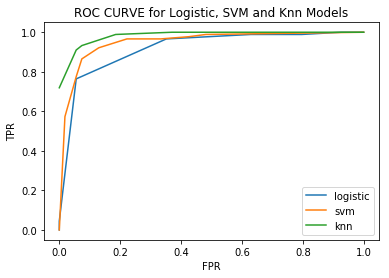

In [498]:
threshold = np.linspace(0.0,1.0,10)
log_roc = logisticRegr.predict_proba(x_test_log)
log_roc = log_roc[:,1]
log_tpr = []
log_fpr = []
for th in threshold:
    hatY = (log_roc > th).astype(int)
    cm = confusion_matrix(hatY, y_test_log)
    tp = cm[0][0] 
    fp = cm[0][1] 
    fn = cm[1][0] 
    tn = cm[1][1] 
    log_tpr.append(tp/(tp+fn))
    log_fpr.append(fp/(fp+tn))



threshold = np.linspace(0.0,1.0,10)
knn_roc = knn.predict_proba(x_test)
knn_roc = knn_roc[:,1]
knn_tpr = []
knn_fpr = []
for th in threshold:
    hatY = (knn_roc > th).astype(int)
    cm = confusion_matrix(hatY, y_test)
    tp = cm[0][0] 
    fp = cm[0][1] 
    fn = cm[1][0] 
    tn = cm[1][1] 
    knn_tpr.append(tp/(tp+fn))
    knn_fpr.append(fp/(fp+tn))
    

threshold = np.linspace(0.0,1.0,10)
svm_roc = svclassifier.predict_proba(x_test)
svm_roc = svm_roc[:,1]
svm_tpr = []
svm_fpr = []
for th in threshold:
    hatY = (svm_roc > th).astype(int)
    cm = confusion_matrix(hatY, y_test)
    tp = cm[0][0] 
    fp = cm[0][1] 
    fn = cm[1][0] 
    tn = cm[1][1] 
    svm_tpr.append(tp/(tp+fn))
    svm_fpr.append(fp/(fp+tn))

plt.figure()
plt.plot(log_fpr, log_tpr, label = "logistic")
plt.plot(svm_fpr, svm_tpr, label = "svm")
plt.plot(knn_fpr, knn_tpr, label = "knn")
plt.title("ROC CURVE for Logistic, SVM and Knn Models")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()


> According to the ROC curve graph plotted, I would say that the SVM was the best model based off of the AUC (since it's graph is closer to 1). The Logistic Model also performed well with its' ROC curve and ARPF scores, however the area below the graph is the least in comparison to the other two models. Based upon the ARPF scores calculated earlier, I would say that the KNN algorithm worked better. In either case, the differences between SVM and KNN were very slim and both were excellent models to use on predicting whether the cancer would be benign or malignant based off the features I had explored. The differences between SVM and KNN were nuanced overall since there were many things that could be manipulated with either algorithm whether that be the kernel for SVM or the number of neighbors for KNN. Based on the scores, KNN did the best but from the ROC curve, SVM model worked the best.